<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/wavelet1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
! pip install -q ssqueezepy

# Example of Wavelet decompostion of 1D signal

## Simple signals

In [95]:
import numpy as np
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow
import matplotlib.pyplot as plt

#%%# Helper fn + params #####################################################
def exp_am(t, offset):
    return np.exp(-pi*((t - offset) / .1)**10)

pi = np.pi
v1, v2, v3 = 64, 128, 32

#%%# Make `x` & plot #########################################################
t = np.linspace(0, 1, 2048, 1)
x = (np.sin(2*pi * v1 * t) * exp_am(t, .2) +
     (np.sin(2*pi * v1 * t) + 2*np.cos(2*pi * v2 * t)) * exp_am(t, .5)  + 
     (2*np.sin(2*pi * v2 * t) - np.cos(2*pi * v3 * t)) * exp_am(t, .8))

#%%# Take CWT & plot #########################################################
Wx, scales = cwt(x, 'morlet')

# reverse the order of scales
scales = np.flip(scales)
Wx = np.flip(Wx, axis=0)



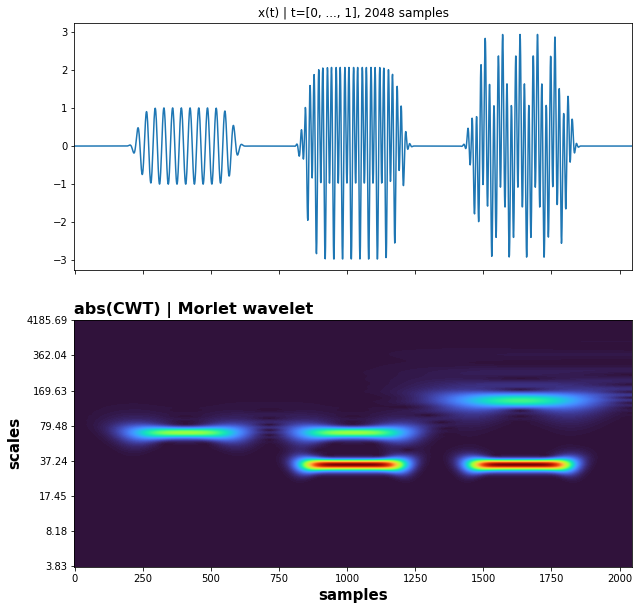

In [91]:
fig,ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].plot(x)
ax[0].set_title("x(t) | t=[0, ..., 1], %s samples" % len(x))

imshow(Wx, yticks=scales, abs=1, ax=ax[1],
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")

## A real sound track

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import os
os.chdir("/content/drive/My Drive/")

In [92]:
x=np.load("wave.npy")

In [93]:
#%%# Take CWT & plot #########################################################
Wx, scales = cwt(x, 'morlet')

# reverse the order of scales
scales = np.flip(scales)
Wx = np.flip(Wx, axis=0)



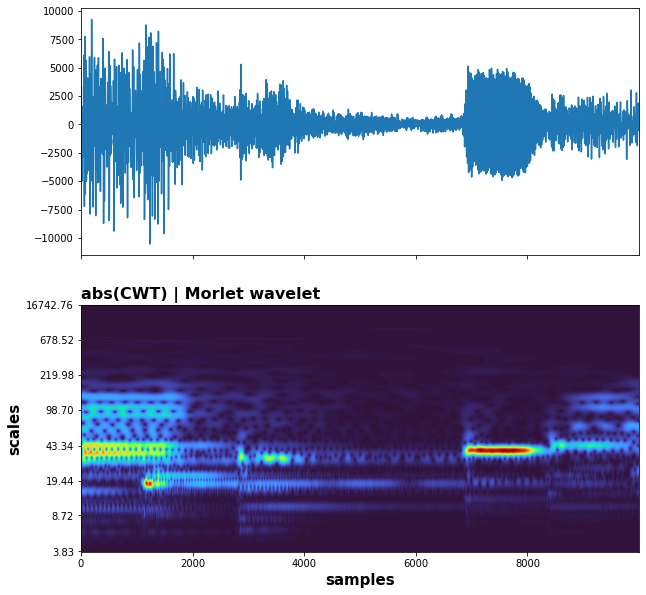

In [94]:
fig,ax = plt.subplots(2,1, figsize=(10,10), sharex=True)
ax[0].plot(x)
imshow(Wx, yticks=scales, abs=1, ax=ax[1],
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")
